In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


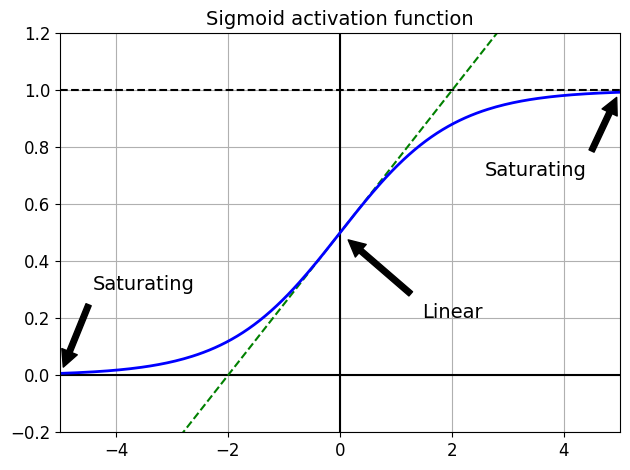

In [3]:

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


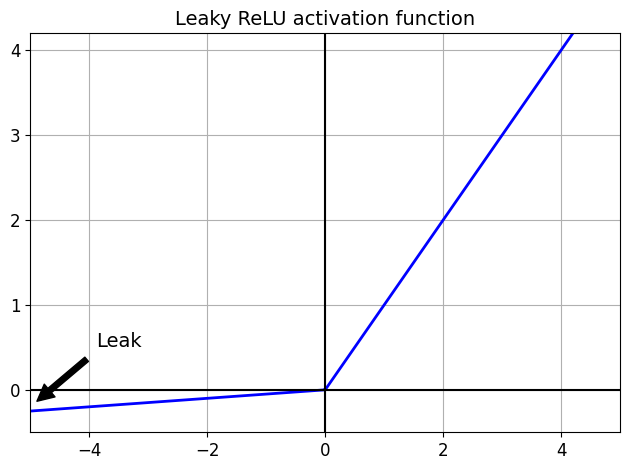

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [9]:

[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [11]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 1.3211 - accuracy: 0.6057 - val_loss: 0.9034 - val_accuracy: 0.7108
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8053 - accuracy: 0.7408 - val_loss: 0.7197 - val_accuracy: 0.7606
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6882 - accuracy: 0.7741 - val_loss: 0.6502 - val_accuracy: 0.7848
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6280 - accuracy: 0.7937 - val_loss: 0.5970 - val_accuracy: 0.8018
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5892 - accuracy: 0.8058 - val_loss: 0.5653 - val_accuracy: 0.8136
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5612 - accuracy: 0.8129 - val_loss: 0.5420 - val_accuracy: 0.8190
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5398 - accuracy: 0.8199 - val_loss: 0.5231 - val_accuracy:

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.3507 - accuracy: 0.6085 - val_loss: 0.8962 - val_accuracy: 0.7322
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7961 - accuracy: 0.7516 - val_loss: 0.7047 - val_accuracy: 0.7762
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6761 - accuracy: 0.7825 - val_loss: 0.6371 - val_accuracy: 0.7942
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6166 - accuracy: 0.7991 - val_loss: 0.5852 - val_accuracy: 0.8114
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5787 - accuracy: 0.8088 - val_loss: 0.5530 - val_accuracy: 0.8216
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5513 - accuracy: 0.8151 - val_loss: 0.5309 - val_accuracy: 0.8250
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5306 - accuracy: 0.8206 - val_loss: 0.5118 - val_accuracy:

In [18]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


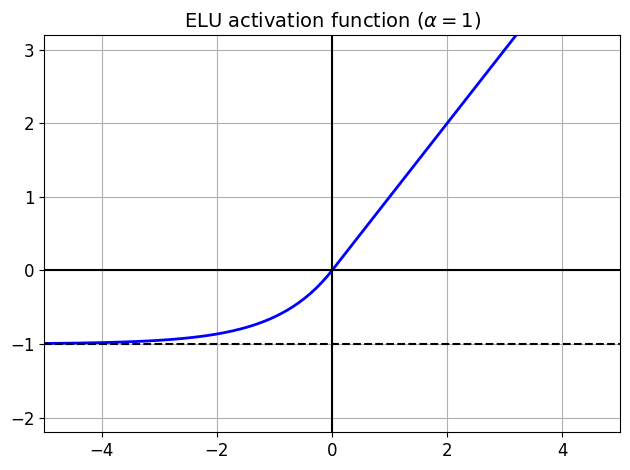

In [19]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [20]:

keras.layers.Dense(10, activation="elu")

In [21]:

from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [22]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


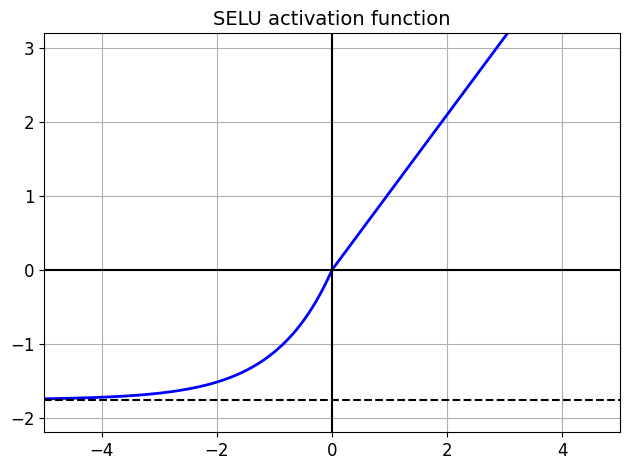

In [23]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

In [24]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [25]:

keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [29]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 37s 20ms/step - loss: 1.0692 - accuracy: 0.5839 - val_loss: 0.7506 - val_accuracy: 0.7338
Epoch 2/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.6420 - accuracy: 0.7711 - val_loss: 0.5431 - val_accuracy: 0.8160
Epoch 3/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.5365 - accuracy: 0.8141 - val_loss: 0.5120 - val_accuracy: 0.8224
Epoch 4/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.4830 - accuracy: 0.8341 - val_loss: 0.4648 - val_accuracy: 0.8388
Epoch 5/5
1719/1719 [==============================] - 31s 18ms/step - loss: 0.4482 - accuracy: 0.8454 - val_loss: 0.4449 - val_accuracy: 0.8546


In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [32]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [33]:

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 31s 16ms/step - loss: 1.8883 - accuracy: 0.2424 - val_loss: 1.6495 - val_accuracy: 0.3304
Epoch 2/5
1719/1719 [==============================] - 27s 16ms/step - loss: 1.3704 - accuracy: 0.4440 - val_loss: 1.0670 - val_accuracy: 0.5832
Epoch 3/5
1719/1719 [==============================] - 27s 16ms/step - loss: 1.0332 - accuracy: 0.5917 - val_loss: 0.9145 - val_accuracy: 0.6448
Epoch 4/5
1719/1719 [==============================] - 27s 16ms/step - loss: 0.9206 - accuracy: 0.6350 - val_loss: 0.7946 - val_accuracy: 0.6666
Epoch 5/5
1719/1719 [==============================] - 27s 16ms/step - loss: 0.8445 - accuracy: 0.6749 - val_loss: 0.7500 - val_accuracy: 0.7276


In [34]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [36]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8579 - accuracy: 0.7153 - val_loss: 0.5599 - val_accuracy: 0.8182
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5722 - accuracy: 0.8039 - val_loss: 0.4795 - val_accuracy: 0.8438
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5160 - accuracy: 0.8229 - val_loss: 0.4427 - val_accuracy: 0.8510
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4786 - accuracy: 0.8346 - val_loss: 0.4205 - val_accuracy: 0.8562
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4531 - accuracy: 0.8412 - val_loss: 0.4036 - val_accuracy: 0.8614
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4373 - accuracy: 0.8474 - val_loss: 0.3917 - val_accuracy: 0.8672
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4252 - accuracy: 0.8511 - val_loss: 0.3818 - val_accuracy:

In [39]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [41]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0417 - accuracy: 0.6717 - val_loss: 0.6793 - val_accuracy: 0.7862
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6722 - accuracy: 0.7819 - val_loss: 0.5595 - val_accuracy: 0.8144
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5900 - accuracy: 0.8043 - val_loss: 0.5039 - val_accuracy: 0.8348
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5407 - accuracy: 0.8177 - val_loss: 0.4704 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5064 - accuracy: 0.8271 - val_loss: 0.4470 - val_accuracy: 0.8544
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4865 - accuracy: 0.8322 - val_loss: 0.4292 - val_accuracy: 0.8606
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4693 - accuracy: 0.8379 - val_loss: 0.4157 - val_accuracy:

In [42]:

optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [43]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

In [44]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [45]:
X_train_A.shape

(43986, 28, 28)

In [46]:
X_train_B.shape

(200, 28, 28)

In [47]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [48]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [49]:
tf.random.set_seed(42)
np.random.seed(42)

In [50]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [51]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [52]:

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.5637 - accuracy: 0.8160 - val_loss: 0.3934 - val_accuracy: 0.8612
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3602 - accuracy: 0.8738 - val_loss: 0.3300 - val_accuracy: 0.8852
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3228 - accuracy: 0.8867 - val_loss: 0.3041 - val_accuracy: 0.8956
Epoch 4/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3022 - accuracy: 0.8948 - val_loss: 0.2902 - val_accuracy: 0.9008
Epoch 5/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2884 - accuracy: 0.9013 - val_loss: 0.2790 - val_accuracy: 0.9063
Epoch 6/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2779 - accuracy: 0.9049 - val_loss: 0.2727 - val_accuracy: 0.9048
Epoch 7/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2694 - accuracy: 0.9082 - val_loss: 0.2682 - val_accuracy:

In [53]:
model_A.save("my_model_A.h5")

In [54]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [55]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [56]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 47ms/step - loss: 0.8589 - accuracy: 0.4650 - val_loss: 0.6087 - val_accuracy: 0.7059
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.5392 - accuracy: 0.7600 - val_loss: 0.4638 - val_accuracy: 0.8387
Epoch 3/20
7/7 [==============================] - 0s 16ms/step - loss: 0.4102 - accuracy: 0.8600 - val_loss: 0.3774 - val_accuracy: 0.9026
Epoch 4/20
7/7 [==============================] - 0s 15ms/step - loss: 0.3314 - accuracy: 0.9000 - val_loss: 0.3156 - val_accuracy: 0.9310
Epoch 5/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2744 - accuracy: 0.9300 - val_loss: 0.2714 - val_accuracy: 0.9493
Epoch 6/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2331 - accuracy: 0.9600 - val_loss: 0.2400 - val_accuracy: 0.9564
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.2040 - accuracy: 0.9700 - val_loss: 0.2163 - val_accuracy: 0.9615
Epoch 8/20
7/7 [===========

In [57]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [58]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [59]:

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [60]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [61]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 38ms/step - loss: 0.6891 - accuracy: 0.5800 - val_loss: 0.6834 - val_accuracy: 0.6004
Epoch 2/4
7/7 [==============================] - 0s 13ms/step - loss: 0.6338 - accuracy: 0.6600 - val_loss: 0.6342 - val_accuracy: 0.6511
Epoch 3/4
7/7 [==============================] - 0s 15ms/step - loss: 0.5862 - accuracy: 0.7000 - val_loss: 0.5912 - val_accuracy: 0.7049
Epoch 4/4
7/7 [==============================] - 0s 14ms/step - loss: 0.5445 - accuracy: 0.7450 - val_loss: 0.5523 - val_accuracy: 0.7383
Epoch 1/16
7/7 [==============================] - 1s 43ms/step - loss: 0.4489 - accuracy: 0.8250 - val_loss: 0.3846 - val_accuracy: 0.8742
Epoch 2/16
7/7 [==============================] - 0s 15ms/step - loss: 0.3130 - accuracy: 0.9250 - val_loss: 0.2962 - val_accuracy: 0.9168
Epoch 3/16
7/7 [==============================] - 0s 15ms/step - loss: 0.2404 - accuracy: 0.9700 - val_loss: 0.2401 - val_accuracy: 0.9452
Epoch 4/16
7/7 [===============

In [62]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1104 - accuracy: 0.9760


[0.11039356142282486, 0.9760000109672546]

In [63]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9860


[0.07649193704128265, 0.9860000014305115]

In [64]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718

In [65]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [66]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [67]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

In [68]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [69]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [70]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [71]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [72]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [73]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [74]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 2ms/step - loss: 0.4901 - accuracy: 0.8281 - val_loss: 0.4049 - val_accuracy: 0.8588
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3816 - accuracy: 0.8655 - val_loss: 0.3731 - val_accuracy: 0.8686
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3476 - accuracy: 0.8764 - val_loss: 0.3734 - val_accuracy: 0.8698
Epoch 4/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3262 - accuracy: 0.8840 - val_loss: 0.3526 - val_accuracy: 0.8744
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.8901 - val_loss: 0.3450 - val_accuracy: 0.8758
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2970 - accuracy: 0.8952 - val_loss: 0.3437 - val_accuracy: 0.8820
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2869 - accuracy: 0.8992 - val_loss: 0.3390 - val_accuracy:

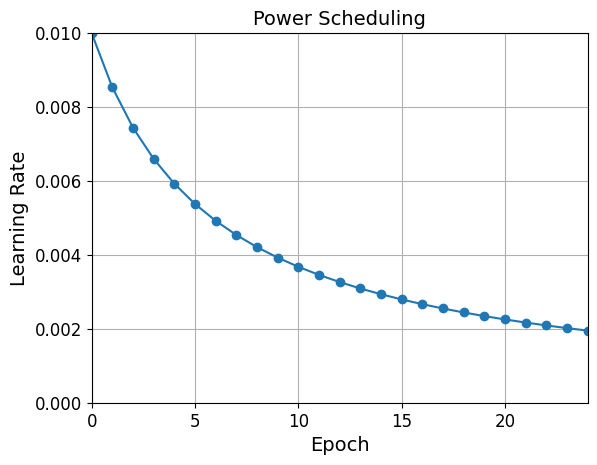

In [75]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [76]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [77]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [78]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [79]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8752 - accuracy: 0.7521 - val_loss: 1.2307 - val_accuracy: 0.6562 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7465 - accuracy: 0.7858 - val_loss: 0.6495 - val_accuracy: 0.8110 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6544 - accuracy: 0.8124 - val_loss: 0.7523 - val_accuracy: 0.8074 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6112 - accuracy: 0.8208 - val_loss: 0.7457 - val_accuracy: 0.7334 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5700 - accuracy: 0.8277 - val_loss: 0.5316 - val_accuracy: 0.8414 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4735 - accuracy: 0.8596 - val_loss: 0.6069 - val_accuracy: 0.8590 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 7s

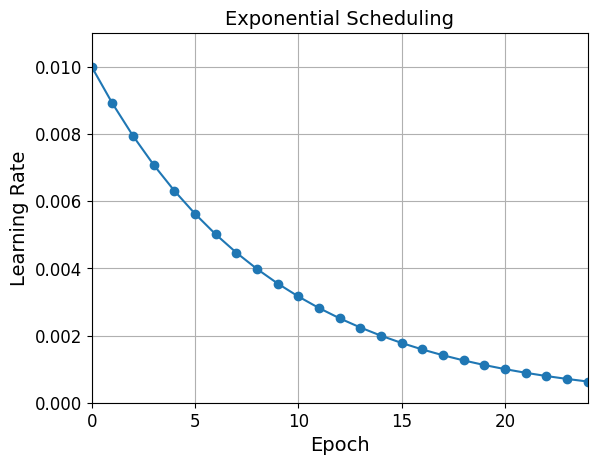

In [81]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [82]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [83]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7765 - accuracy: 0.7709 - val_loss: 0.7620 - val_accuracy: 0.7734 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6526 - accuracy: 0.8017 - val_loss: 0.5745 - val_accuracy: 0.8244 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5523 - accuracy: 0.8288 - val_loss: 0.6503 - val_accuracy: 0.8066 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5102 - accuracy: 0.8396 - val_loss: 0.5806 - val_accuracy: 0.8356 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4725 - accuracy: 0.8516 - val_loss: 0.5162 - val_accuracy: 0.8666 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4261 - accuracy: 0.8634 - val_loss: 0.4363 - val_accuracy: 0.8610 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

In [85]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

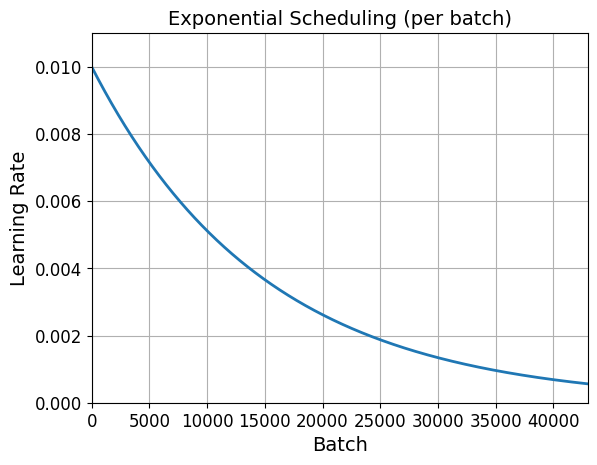

In [86]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

In [87]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [88]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [89]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8951 - accuracy: 0.7459 - val_loss: 1.1537 - val_accuracy: 0.6412 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0315 - accuracy: 0.6933 - val_loss: 0.8066 - val_accuracy: 0.7304 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8687 - accuracy: 0.7011 - val_loss: 1.4815 - val_accuracy: 0.6466 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0323 - accuracy: 0.6477 - val_loss: 1.0966 - val_accuracy: 0.6122 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0955 - accuracy: 0.6227 - val_loss: 0.9945 - val_accuracy: 0.6626 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7457 - accuracy: 0.7154 - val_loss: 0.7894 - val_accuracy: 0.7334 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 9

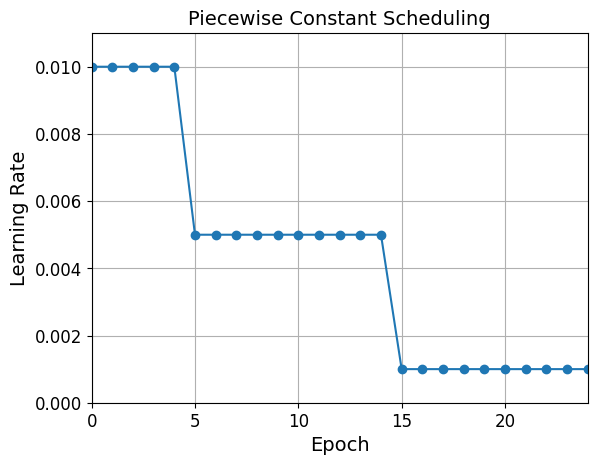

In [90]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [91]:
tf.random.set_seed(42)
np.random.seed(42)

In [92]:

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6042 - accuracy: 0.8042 - val_loss: 0.4895 - val_accuracy: 0.8472 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5009 - accuracy: 0.8381 - val_loss: 0.6190 - val_accuracy: 0.8318 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5177 - accuracy: 0.8418 - val_loss: 0.5172 - val_accuracy: 0.8542 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5087 - accuracy: 0.8477 - val_loss: 0.5157 - val_accuracy: 0.8514 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5099 - accuracy: 0.8498 - val_loss: 0.5237 - val_accuracy: 0.8304 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5477 - accuracy: 0.8482 - val_loss: 0.5841 - val_accuracy: 0.8508 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 6s

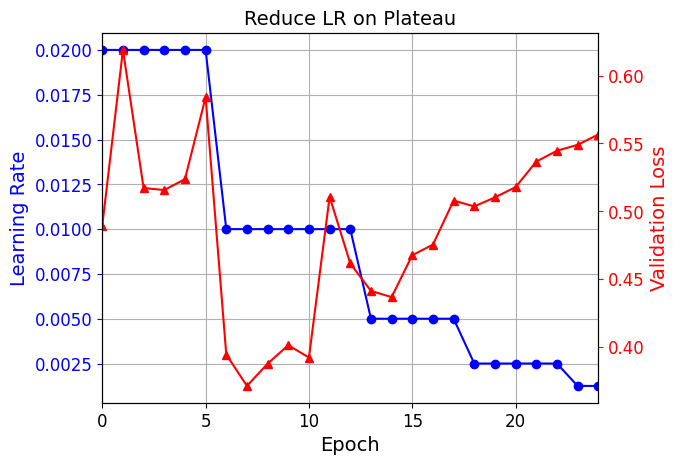

In [93]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [94]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4892 - accuracy: 0.8270 - val_loss: 0.4020 - val_accuracy: 0.8616
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3787 - accuracy: 0.8655 - val_loss: 0.3676 - val_accuracy: 0.8724
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3448 - accuracy: 0.8767 - val_loss: 0.3727 - val_accuracy: 0.8696
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3231 - accuracy: 0.8849 - val_loss: 0.3476 - val_accuracy: 0.8774
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3073 - accuracy: 0.8899 - val_loss: 0.3384 - val_accuracy: 0.8802
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2927 - accuracy: 0.8953 - val_loss: 0.3377 - val_accuracy: 0.8820
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2824 - accuracy: 0.8990 - val_loss: 0.3319 - val_accuracy:

In [95]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

In [96]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [97]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.3610


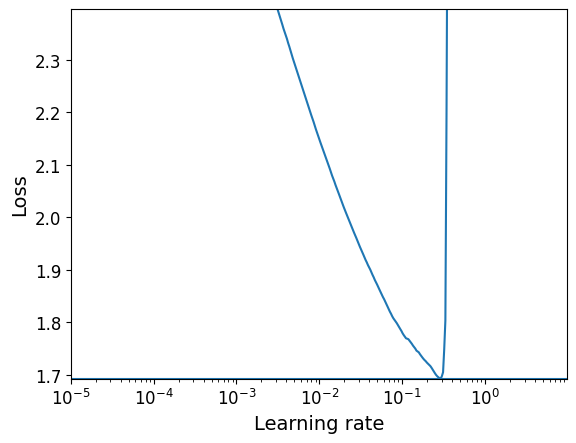

In [98]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [99]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [103]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 3s 7ms/step - loss: 2.4417 - accuracy: 0.7449 - val_loss: 2.6875 - val_accuracy: 0.7260
Epoch 2/25
430/430 [==============================] - 3s 7ms/step - loss: 1.0196 - accuracy: 0.7905 - val_loss: 0.7951 - val_accuracy: 0.8106
Epoch 3/25
430/430 [==============================] - 3s 7ms/step - loss: 6.6138 - accuracy: 0.5835 - val_loss: 1.4086 - val_accuracy: 0.7278
Epoch 4/25
430/430 [==============================] - 3s 7ms/step - loss: 16.5862 - accuracy: 0.6411 - val_loss: 17.0823 - val_accuracy: 0.4304
Epoch 5/25
430/430 [==============================] - 3s 7ms/step - loss: 6.7520 - accuracy: 0.6199 - val_loss: 2.5213 - val_accuracy: 0.7002
Epoch 6/25
430/430 [==============================] - 3s 7ms/step - loss: 1.8042 - accuracy: 0.7408 - val_loss: 1.5514 - val_accuracy: 0.7046
Epoch 7/25
430/430 [==============================] - 3s 7ms/step - loss: 26.3602 - accuracy: 0.6012 - val_loss: 76.5167 - val_accuracy: 0.1196
Ep

In [101]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [102]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 11s 6ms/step - loss: 1.6037 - accuracy: 0.8112 - val_loss: 0.7208 - val_accuracy: 0.8306
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7177 - accuracy: 0.8279 - val_loss: 0.6794 - val_accuracy: 0.8376


In [104]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 10s 6ms/step - loss: 1.6485 - accuracy: 0.8117 - val_loss: 0.7233 - val_accuracy: 0.8300
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7189 - accuracy: 0.8278 - val_loss: 0.6803 - val_accuracy: 0.8400


In [105]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5679 - accuracy: 0.8041 - val_loss: 0.3714 - val_accuracy: 0.8636
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4234 - accuracy: 0.8456 - val_loss: 0.3484 - val_accuracy: 0.8692


In [106]:
tf.random.set_seed(42)
np.random.seed(42)

In [107]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6638 - accuracy: 0.7595 - val_loss: 0.6017 - val_accuracy: 0.8438
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5568 - accuracy: 0.7942 - val_loss: 0.5473 - val_accuracy: 0.8508
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5238 - accuracy: 0.8067 - val_loss: 0.5212 - val_accuracy: 0.8530
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5103 - accuracy: 0.8086 - val_loss: 0.4609 - val_accuracy: 0.8640
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4923 - accuracy: 0.8177 - val_loss: 0.4543 - val_accuracy: 0.8626
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4809 - accuracy: 0.8216 - val_loss: 0.4802 - val_accuracy: 0.8646
Epoch 7/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4712 - accuracy: 0.8266 - val_loss: 0.4638 - val_accuracy

In [108]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4676 - accuracy: 0.8599


[0.46762725710868835, 0.8598999977111816]

In [109]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.3418 - accuracy: 0.8836


[0.34177395701408386, 0.883618175983429]

In [110]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 8s 4ms/step - loss: 0.4242 - accuracy: 0.8424


In [111]:
tf.random.set_seed(42)
np.random.seed(42)

In [112]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [113]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 [==============================] - 0s 88ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [114]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.05, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.06, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.34, 0.  , 0.56]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.36, 0.  , 0.43]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.14, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.18, 0.  , 0.79]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.44, 0.  , 0.31, 0.  , 0.24]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.14, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.07, 0.  , 0.74]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.21, 0.  , 0.77]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.04, 0.  , 0

In [115]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.22, 0.  , 0.69]],
      dtype=float32)

In [116]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.2 , 0.  , 0.26]],
      dtype=float32)

In [117]:
y_pred = np.argmax(y_proba, axis=1)

In [118]:

accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8696

In [119]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [120]:
tf.random.set_seed(42)
np.random.seed(42)

In [121]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [122]:
mc_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense_263 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_264 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)            

In [123]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [124]:
mc_model.set_weights(model.get_weights())

In [125]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 [==============================] - 0s 16ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.2 , 0.  , 0.69]],
      dtype=float32)

In [126]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [127]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4744 - accuracy: 0.8339 - val_loss: 0.3733 - val_accuracy: 0.8670
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3521 - accuracy: 0.8721 - val_loss: 0.3842 - val_accuracy: 0.8572
